In [31]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

folder_to_process = "/Users/Khmer/Developer/ObjectManipulation/pere_resu/archive/continuous_8_0.3_7e-5/"


from os import listdir
from os.path import isfile, join
csv_files = [f for f in listdir(folder_to_process) if isfile(join(folder_to_process, f))]

print(csv_files)
# import data with loadtxt, but only the relevant floats. 
# data.csv is the file as you have given it above


# import the tick labels
#xt = np.loadtxt('run_train_7-tag-Perf_MaxReward.csv', dtype='str', delimiter=',', skiprows = 0, usecols = (0,1,2))





['Reward 3.csv', 'Reward.csv']


# Create plot
grap shows all runs and average result

119


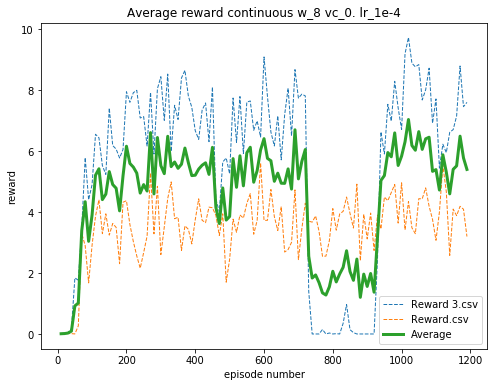

In [32]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
fig,ax = plt.subplots()
# Get current size

runs = []
min_max_step = 99999999

for file in csv_files:
    data = np.loadtxt(folder_to_process + file, delimiter=',', skiprows = 1, usecols = (0,1,2))
    data = data.transpose()
    x = data[1]
    y = data[2]
    max_step = x[-1]
    if max_step < min_max_step:
        min_max_step = max_step
    
    runs.append({"episode": x, "reward": y, "file": file, "time": data[0] - data[0][0]})
    
max_index = runs[0]["episode"].tolist().index(min_max_step)
    
#cuted_runs = 
#plt.show()
#print(max_index)
#print(min_max_step)
#print(runs[0][0])

#tmp = runs[0][0][0:max_index+1]
#print(tmp)
#print(runs[0][0])

x = runs[0]["episode"][0:max_index+1]
average = np.zeros(max_index+1)
print(average.size)

for r in runs:
    y = r["reward"][0:max_index+1]
    text = r["file"]
    #print r[3]
    data_line = ax.plot(x, y, label=text, linewidth=1.0, linestyle='--')
    #print(y.size)
    average = np.sum([average, y], axis=0)

average /= len(runs)
    
#print(average)
average_line = ax.plot(x, average, label='Average', linewidth=3.0)
ax.set_xlabel("episode number")
ax.set_ylabel("reward")


legend = ax.legend(loc='lower right')
plt.title("Average reward continuous w_8 vc_0. lr_1e-4")
plt.show()
    


('max time: ', 99999999)
('min_max_index:', 999999)
('step', 100)


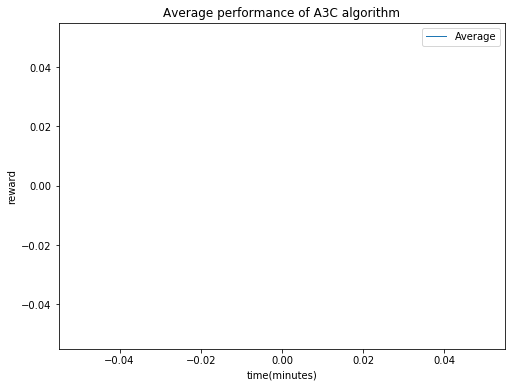

In [6]:
#Find min episode time
min_max_time = 99999999
for r in runs:
    max_time = r["time"][-1]
    if max_time < min_max_time: 
        min_max_time = max_time

print("max time: ", min_max_time)

#Find min number episode in this time
min_max_index = 999999
for r in runs:
    filtered_time = [i for i in r["time"] if i < min_max_time]
    max_index = len(filtered_time)
    if max_index < min_max_index:
        min_max_index = max_index
    
print("min_max_index:", min_max_index)
    


#Calculate time step
step = min_max_time / min_max_index
print("step", step)

#calculate average value for each time_step
cur_time = step
cur_indexs = [0]*len(runs)
average_y = []
average_x = []
while cur_time < min_max_time:
    number_of_variables = 0
    sum_of_variables = 0
    for i, r in enumerate(runs):
        cur_index = cur_indexs[i]
        while r["time"][cur_index] < cur_time:
            cur_index += 1
        cur_index -= 1
        cur_indexs[i] = cur_index
        if r["time"][cur_index] > (cur_time - step):
            number_of_variables += 1
            sum_of_variables += r["reward"][cur_index]
    #print(number_of_variables)
    if(number_of_variables > 0):
        average_x.append(cur_time / 60)
        average_y.append(sum_of_variables/number_of_variables)
    cur_time += step
        
fig,ax = plt.subplots()

average_line = ax.plot(average_x, average_y, label='Average', linewidth=1.0)
ax.set_xlabel("time(minutes)")
ax.set_ylabel("reward")


legend = ax.legend(loc='upper right')
plt.title("Average performance of A3C algorithm")
plt.show()
        
#print(average_y)
        
        